In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the numpy, matplotlib and pandas libraries to work with arrays,
visualization and matrices, respectively

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import the dataset and split into two vectors for independent and dependent variables

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Polynomial Linear Regression/Position_Salaries_poly.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y = y.reshape(len(y),1)

In [ ]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Use feature scaling to convert the X and y values to values between 0 and 1

In [ ]:
from sklearn.preprocessing import StandardScaler
scal_X = StandardScaler()
scal_y = StandardScaler()
X = scal_X.fit_transform(X)
y = scal_y.fit_transform(y)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

The inverse_transform() function to convert the value passed in to the original value in the dataset after applying feature scaling

In [ ]:
scal_y.inverse_transform(regressor.predict(scal_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

Create a graph to visualize the model, and add title and labels

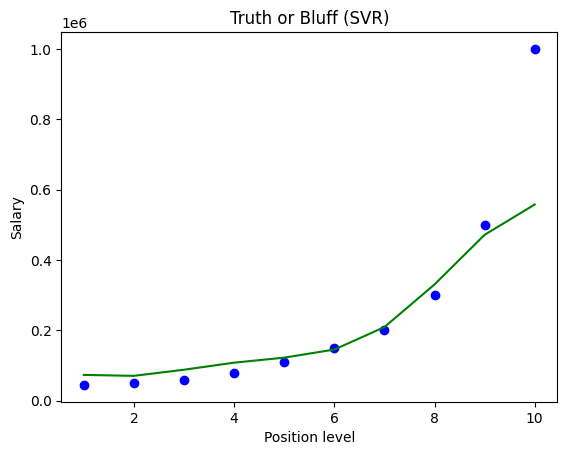

In [ ]:
plt.scatter(scal_X.inverse_transform(X), scal_y.inverse_transform(y), color = 'blue')
plt.plot(scal_X.inverse_transform(X), scal_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'green')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()